# Stochastic Optimizer Comparison: *classification with Mnist*

In [1]:
%matplotlib inline
import stochastic_optimizer
import numpy as np
from glob import glob
import matplotlib.pyplot as plt

# Original Mnist
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784', version=1, data_home='.')
X, y = [mnist.data, mnist.target]

/Users/ushioasahi/pyenv/stoch/lib/python3.6/site-packages/sklearn/externals/joblib/__init__.py:15: FutureWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=FutureWarning)


## Hyperparamer grid search

In [18]:
# p_3 = {'rms': [True, False], 'var_w': np.linspace(0.1, 1, 20), 'decay':[False, True]}

setting = {'loss': 'log', 'warm_start': True,'n_jobs': 10, "fit_intercept": True}

classifiers = [
    ("SGD", stochastic_optimizer.estimator.SGDClassifier(**setting),
     {'eta0': np.linspace(0.00005, 0.1, 30), 'power_t': [0.5, 1]}),
#     ("AdaGrad", AdaGradClassifier(**setting),
#      {'eta0': np.linspace(0.00005, 0.1, 30)}),
#     ("RMSprop", RMSpropClassifier(**setting),
#      {'eta0': np.linspace(0.00005, 0.1, 30), 'var_w': np.linspace(0.01, 1, 20)}),
#     ("Adam", AdamClassifier(**setting),
#      {'eta0': np.linspace(0.00005, 0.1, 30), 'var_w': np.linspace(0.01, 1, 20)}),
    ("AdaDelta", stochastic_optimizer.estimator.AdaDeltaClassifier(**setting),
     {'eps_': [10**i for i in np.linspace(-10, -1, 30)], 'rms':[True, False], 'var_w': np.linspace(0.01, 1, 20)}),
#     ("VSGD", VSGDClassifier(**setting),
#     {'rms': [True, False], 'var_w': np.linspace(0.1, 1, 20), 'decay':[False, True]}),
]

X_s, y_s = X[0:10000, :], y[0:10000]
stochastic_optimizer.framework.GridSearch(X_s, y_s, classifiers, scoring="accuracy")

/Users/ushioasahi/pyenv/stoch/lib/python3.6/site-packages/sklearn/base.py:197: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)
2019-12-28 14:53:03,246 root         INFO     *** start grid search (['SGD', 'AdaDelta']) ***
2019-12-28 14:53:03,248 root         INFO      - searching: SGD
2019-12-28 14:58:15,485 root         INFO      -> alpha:0.0001
2019-12-28 14:58:15,490 root         INFO      -> eps_:1e-06
2019-12-28 14:58:15,492 root         INFO      -> eta0:0.06208793103448277
2019-12-28 14:58:15,494 root         INFO      -> fit_intercept:True
2019-12-28 14:58:15,495 root         INFO      -> loss:log
2019-12-28 14:58:15,498 root         INFO      -> n_jobs:10
2019-12-28 14:58:15,499 root         INFO      -> penalty:None
2019-12-28 14:58:15,503 root         INFO      -> power_t:0.5
2019-12-28 14:58:15,504 root         INFO      -> warm_start:True


  File "/usr/local/Cellar/python/3.6.5_1/Frameworks/Python.framework/Versions/3.6/lib/python3.6/multiprocessing/queues.py", line 334, in get
    with self._rlock:
  File "/usr/local/Cellar/python/3.6.5_1/Frameworks/Python.framework/Versions/3.6/lib/python3.6/multiprocessing/queues.py", line 334, in get
    with self._rlock:
  File "/Users/ushioasahi/analysis/StochasticOptimizers/stochastic_optimizer/estimator/utility/base_classifier.py", line 11, in argwrapper
    return args[0](**args[1])
  File "/usr/local/Cellar/python/3.6.5_1/Frameworks/Python.framework/Versions/3.6/lib/python3.6/multiprocessing/queues.py", line 334, in get
    with self._rlock:
  File "/Users/ushioasahi/analysis/StochasticOptimizers/stochastic_optimizer/estimator/AdaDelta.py", line 61, in _fit
    gd = opt.grad(X[i, :], y[i], coef_)
  File "/usr/local/Cellar/python/3.6.5_1/Frameworks/Python.framework/Versions/3.6/lib/python3.6/multiprocessing/synchronize.py", line 96, in __enter__
    return self._semlock.__enter_

KeyboardInterrupt: 

## Linear model training

/Users/ushioasahi/pyenv/stoch/lib/python3.6/site-packages/sklearn/base.py:197: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)
2019-12-28 16:21:52,580 root         INFO     *** Learning Curve Test ***
2019-12-28 16:21:52,581 root         INFO     input shape: 70000, 784
2019-12-28 16:21:52,583 root         INFO     output shape: 70000
2019-12-28 16:21:52,584 root         INFO     train size: 69300.00
2019-12-28 16:21:52,586 root         INFO      training SGD
2019-12-28 16:21:52,588 root         INFO       rounds 1 / 2
2019-12-28 16:21:53,961 root         INFO        iter 1 / 99
2019-12-28 16:21:54,447 root         INFO        iter 2 / 99
2019-12-28 16:21:54,914 root         INFO        iter 3 / 99
2019-12-28 16:21:55,325 root         INFO        iter 4 / 99
2019-12-28 16:21:55,732 root         INFO        iter 5 / 99
2019-12-28 16:21:56,139 root     

2019-12-28 16:22:46,352 root         INFO        iter 22 / 99
2019-12-28 16:22:46,788 root         INFO        iter 23 / 99
2019-12-28 16:22:47,248 root         INFO        iter 24 / 99
2019-12-28 16:22:47,673 root         INFO        iter 25 / 99
2019-12-28 16:22:48,210 root         INFO        iter 26 / 99
2019-12-28 16:22:48,617 root         INFO        iter 27 / 99
2019-12-28 16:22:49,023 root         INFO        iter 28 / 99
2019-12-28 16:22:49,430 root         INFO        iter 29 / 99
2019-12-28 16:22:49,837 root         INFO        iter 30 / 99
2019-12-28 16:22:50,244 root         INFO        iter 31 / 99
2019-12-28 16:22:50,649 root         INFO        iter 32 / 99
2019-12-28 16:22:51,055 root         INFO        iter 33 / 99
2019-12-28 16:22:51,453 root         INFO        iter 34 / 99
2019-12-28 16:22:51,857 root         INFO        iter 35 / 99
2019-12-28 16:22:52,261 root         INFO        iter 36 / 99
2019-12-28 16:22:52,674 root         INFO        iter 37 / 99
2019-12-

2019-12-28 16:23:50,924 root         INFO        iter 53 / 99
2019-12-28 16:23:51,332 root         INFO        iter 54 / 99
2019-12-28 16:23:51,749 root         INFO        iter 55 / 99
2019-12-28 16:23:52,166 root         INFO        iter 56 / 99
2019-12-28 16:23:52,583 root         INFO        iter 57 / 99
2019-12-28 16:23:53,108 root         INFO        iter 58 / 99
2019-12-28 16:23:53,659 root         INFO        iter 59 / 99
2019-12-28 16:23:54,194 root         INFO        iter 60 / 99
2019-12-28 16:23:54,698 root         INFO        iter 61 / 99
2019-12-28 16:23:55,577 root         INFO        iter 62 / 99
2019-12-28 16:23:56,142 root         INFO        iter 63 / 99
2019-12-28 16:23:56,679 root         INFO        iter 64 / 99
2019-12-28 16:23:57,206 root         INFO        iter 65 / 99
2019-12-28 16:23:57,632 root         INFO        iter 66 / 99
2019-12-28 16:23:58,171 root         INFO        iter 67 / 99
2019-12-28 16:23:58,711 root         INFO        iter 68 / 99
2019-12-

2019-12-28 16:24:53,013 root         INFO        iter 85 / 99
2019-12-28 16:24:53,425 root         INFO        iter 86 / 99
2019-12-28 16:24:53,831 root         INFO        iter 87 / 99
2019-12-28 16:24:54,244 root         INFO        iter 88 / 99
2019-12-28 16:24:54,651 root         INFO        iter 89 / 99
2019-12-28 16:24:55,059 root         INFO        iter 90 / 99
2019-12-28 16:24:55,462 root         INFO        iter 91 / 99
2019-12-28 16:24:55,874 root         INFO        iter 92 / 99
2019-12-28 16:24:56,287 root         INFO        iter 93 / 99
2019-12-28 16:24:56,805 root         INFO        iter 94 / 99
2019-12-28 16:24:57,216 root         INFO        iter 95 / 99
2019-12-28 16:24:57,627 root         INFO        iter 96 / 99
2019-12-28 16:24:58,035 root         INFO        iter 97 / 99
2019-12-28 16:24:58,449 root         INFO        iter 98 / 99
2019-12-28 16:24:58,861 root         INFO        iter 99 / 99
2019-12-28 16:24:59,277 root         INFO        iter 100 / 99
2019-12

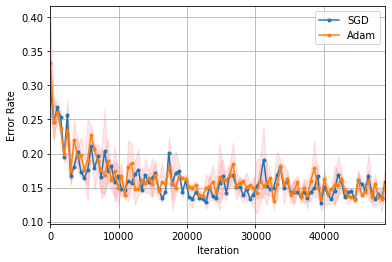

In [2]:
setting = {'loss': 'log', 'warm_start': True,'n_jobs': 10, "fit_intercept": True}
classifiers = [
    ("SGD", stochastic_optimizer.estimator.SGDClassifier(**setting)),
#     ("VSGD", stochastic_optimizer.estimator.VSGDClassifier(**setting)),
#     ("AdaGrad", stochastic_optimizer.estimator.AdaGradClassifier(**best_parameter["AdaGrad"])),
#     ("RMSprop", stochastic_optimizer.estimator.RMSpropClassifier(**best_parameter["RMSprop"])),
    ("Adam", stochastic_optimizer.estimator.AdamClassifier(**setting)),
#     ("AdaDelta", stochastic_optimizer.estimator.AdaDeltaClassifier(**best_parameter["AdaDelta"])),
]
fig = stochastic_optimizer.framework.LearningCurveClassifier(
    X, y, classifiers, rounds=2, split=100, path='example_results/linear_model_mnist')

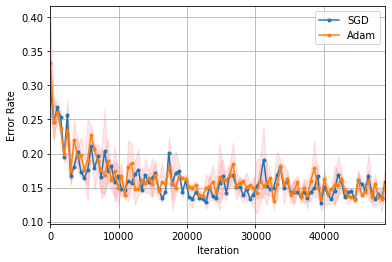

In [6]:
fig